In [1]:
import os

## Read results from file

In [15]:
DATA_PATH = '../../data/tinytom'
RESULTS_PATH = '../../data/results/tinytom'
FB_CONDITION = '0_forward_belief_false_belief'
TB_CONDITION = '0_forward_belief_true_belief'
fb_files = [
    # 'auto_accuracy_roneneldan_TinyStories-28M_0.0_belief_false_belief_0_50.csv',
    'auto_accuracy__scr_snbloom_models_finetuned-28-tinytom-v2-100_checkpoint-80_0.0_belief_false_belief_0_50.csv',
            'auto_accuracy__scr_snbloom_models_finetuned-28-tinytom-v2-200_checkpoint-140_0.0_belief_false_belief_0_50.csv',
            'auto_accuracy__scr_snbloom_models_finetuned-28-tinytom-v2-500_checkpoint-320_0.0_belief_false_belief_0_50.csv',
            'auto_accuracy__scr_snbloom_models_finetuned-28-tinytom-v2-600_checkpoint-380_0.0_belief_false_belief_0_50.csv',
            # 'auto_accuracy__scr_snbloom_models_finetuned-33-tinytom-v2-100_checkpoint-140_0.0_belief_false_belief_0_50.csv',
            # 'auto_accuracy__scr_snbloom_models_finetuned-33-tinytom-v2-200_checkpoint-260_0.0_belief_false_belief_0_50.csv',
]
tb_files = [f.replace('false', 'true') for f in fb_files]
# Read the CSV files into lists of lines
ufb_lines = []
for file in fb_files:
    with open(f'{RESULTS_PATH}/{FB_CONDITION}/{file}', 'r') as f:
        ufb_lines.append(f.readlines())

tb_lines = []
for file in tb_files:
    with open(f'{RESULTS_PATH}/{TB_CONDITION}/{file}', 'r') as f:
        tb_lines.append(f.readlines())





## Annotate correctness

In [187]:
fb_lines = [[] for _ in fb_files]
for i in range(len(ufb_lines[0])):
    fb_answers = [model[i].strip().lower() for model in ufb_lines]
    tb_answers = [model[i].strip().lower() for model in tb_lines]
    for m in range(len(fb_answers)):
        if fb_answers[m] == 'correct' and tb_answers[m] == 'correct':
        # if tb_answers[m] == 'correct':
            fb_lines[m].append('correct')
        else:
            fb_lines[m].append('incorrect')

## Read results from file

In [188]:
agreement = {}

for i in range(len(fb_lines[0])):
    agreement[i] = {'correct': 0, 'incorrect': 0, 'unrelated': 0, 'inconsistent': 0}
    answers_for_current_question = [model[i].strip().lower() for model in fb_lines]
    
    for m in range(len(fb_lines)):
        for n in range(m+1, len(fb_lines)):
            if answers_for_current_question[m] == answers_for_current_question[n]:
                if answers_for_current_question[m] == 'correct':
                    agreement[i]['correct'] += 1
                elif answers_for_current_question[m] == 'incorrect':
                    agreement[i]['incorrect'] += 1
                elif answers_for_current_question[m] == 'unrelated':
                    agreement[i]['unrelated'] += 1
                elif answers_for_current_question[m] == 'inconsistent':
                    agreement[i]['inconsistent'] += 1
            else:
                continue
print(agreement)

{0: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 1: {'correct': 0, 'incorrect': 3, 'unrelated': 0, 'inconsistent': 0}, 2: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 3: {'correct': 0, 'incorrect': 3, 'unrelated': 0, 'inconsistent': 0}, 4: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 5: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 6: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 7: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 8: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 9: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 10: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 11: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 12: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 13: {'correct': 0, 'incorrect': 6, 'unrelated': 0, 'inconsistent': 0}, 14: {'correct':

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 6, 1, 0, 6, 3, 0, 3, 1, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[6, 3, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 1, 6, 6, 6, 6, 3, 3, 6, 1, 6, 1, 3, 6, 0, 1, 6, 0, 0, 6, 0, 1, 6, 6, 6, 1, 0, 0, 6, 6, 6, 6, 6, 6, 3]


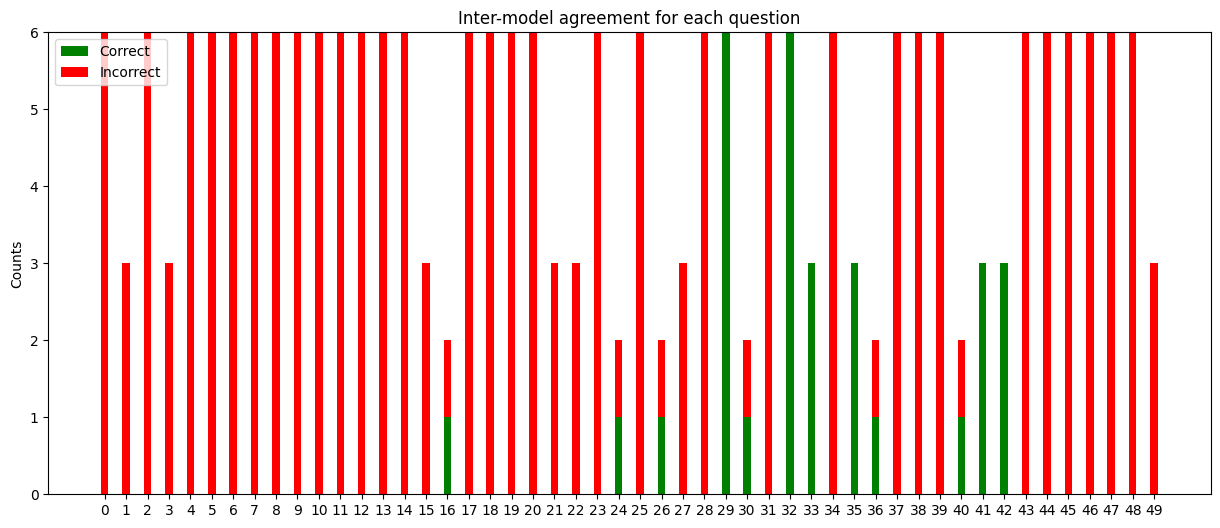

In [189]:
import matplotlib.pyplot as plt

# Assuming the earlier provided code and 'agreement' dictionary is already in place...

labels = list(agreement.keys())
correct_vals = [agreement[key]['correct'] for key in labels]
incorrect_vals = [agreement[key]['incorrect'] for key in labels]
# unrelated_vals = [agreement[key]['unrelated'] for key in labels]
# inconsistent_vals = [agreement[key]['inconsistent'] for key in labels]
print(correct_vals)
print(incorrect_vals)
# print(unrelated_vals)
# print(inconsistent_vals)

width = 0.35  # width of the bars
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(labels, correct_vals, width, label='Correct', color='g')
ax.bar(labels, incorrect_vals, width, bottom=correct_vals, label='Incorrect', color='r')
# ax.bar(labels, unrelated_vals, width, bottom=[i+j for i,j in zip(correct_vals, incorrect_vals)], label='Unrelated', color='b')
# ax.bar(labels, inconsistent_vals, width, bottom=[i+j+k for i,j,k in zip(correct_vals, incorrect_vals, unrelated_vals)], label='Inconsistent', color='y')

ax.set_ylabel('Counts')
ax.set_title('Inter-model agreement for each question')
ax.set_xticks(labels)
ax.legend()

plt.show()


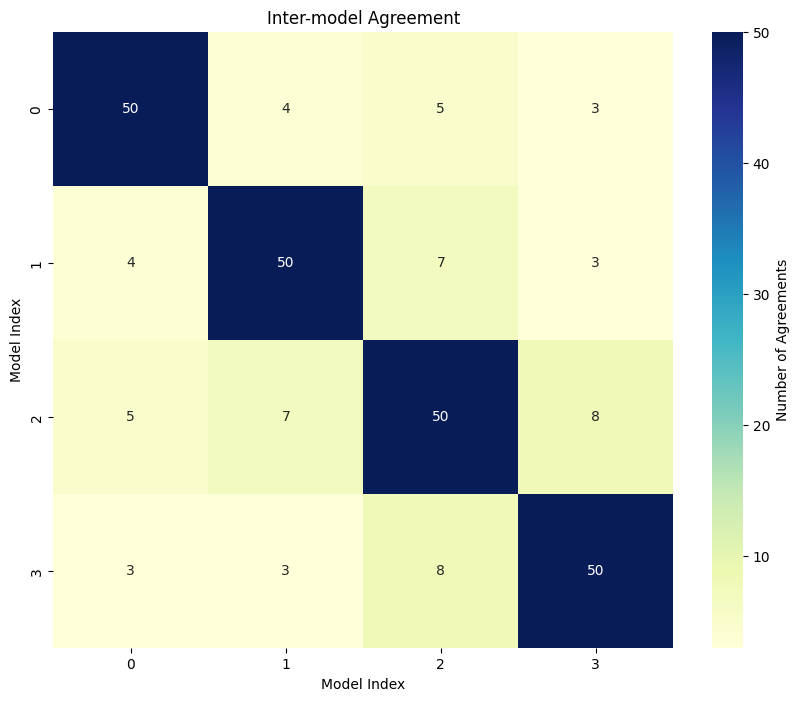

In [190]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the earlier provided 'fb_lines' list...

model_count = len(fb_lines)
agreement_matrix = np.zeros((model_count, model_count))
agreement_matrix += np.eye(model_count) * len(fb_lines[0])  # Initialize the diagonal with the number of questions

for i in range(len(fb_lines[0])):
    answers_for_current_question = [model[i].strip().lower() for model in fb_lines]
    
    for m in range(model_count):
        for n in range(m+1, model_count):
            if answers_for_current_question[m] == answers_for_current_question[n] and answers_for_current_question[m] == 'correct':
                agreement_matrix[m][n] += 1
                agreement_matrix[n][m] += 1  # The matrix is symmetrical

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(agreement_matrix, annot=True, cmap="YlGnBu", ax=ax, cbar_kws={'label': 'Number of Agreements'})
ax.set_title('Inter-model Agreement')
ax.set_xlabel('Model Index')
ax.set_ylabel('Model Index')
plt.show()


## Pos examples

In [191]:
# number of questions where all models agree
# list all ids where all models agree
ids = [i for i in range(len(correct_vals)) if correct_vals[i] >= 3]
print(len(ids))

# print the questions
data_file = f'{DATA_PATH}/tinytom.csv'
with open(data_file, 'r') as f:
    lines = f.readlines()
    for i in ids:
        print(lines[i].split(';')[0])


6
Sam was in the kitchen making a cake. Sam wanted to wash his hands before he started to bake. The sink in the kitchen was clean. Sam believed the sink was clean. Over time, the sink slowly filled with dirty water from the leaking tap.
Benny was at the park near the harmless creek. Benny wanted to sing a new song he just learned. The creek was quiet and restful. Benny believed the creek was quiet and restful. A group of ducks landed in the creek, disrupting its quiet flow.
Lenny was in a subway station waiting for his train. Lenny wanted to share his lunch with a friend who was also taking the subway. The tracks for the subway were aligned. Lenny believed the tracks for the subway were aligned. A subway worker, while doing his routine checks, found a misalignment in the tracks and fixed it.
Noah was at a busy coffee shop waiting for his friend. Noah wanted to buy a coffee and sit with his friend. The coffee machine was working well. Noah thought the coffee machine was working well. Th

In [192]:
# print gen settings
settings_file = f'{DATA_PATH}/tinytom_settings.txt'
with open(settings_file, 'r') as f:
    lines = f.readlines()
    for i in ids:
        print(lines[i])

{'noun': 'sink', 'verb': 'want', 'adj': 'fair', 'word': '', 'features': [], 'property': 'opacity (e.g., is the object opaque, translucent, or transparent)'}{'reasoning': ' If Sam was not paying attention to the sink, it is possible that he did not notice the dirty water slowly filling it up. The leaking tap is a valid reason for the sink to fill with water.'}

{'noun': 'creek', 'verb': 'sing', 'adj': 'harmless', 'word': '', 'features': [], 'property': 'restful or disruptive (e.g., is an environment restful or disruptive)'}{'reasoning': " The ducks landing in the creek would disrupt its quiet flow, making noise and creating ripples. However, if Benny was focused on singing his new song, he might not notice the change in the creek's state. The arrival of the ducks is a valid cause for the creek's disruption."}

{'noun': 'subway', 'verb': 'share', 'adj': 'wealthy', 'word': '', 'features': [], 'property': 'aligned or misaligned (e.g., are objects aligned or misaligned)'}{'reasoning': ' Len

## Neg examples



In [193]:
# number of questions where all models agree
# list all ids where all models agree
neg_ids = [i for i in range(len(correct_vals)) if correct_vals[i] == 0]
print(len(ids))
# print the questions
data_file = f'{DATA_PATH}/tinytom.csv'
with open(data_file, 'r') as f:
    lines = f.readlines()
    for i in neg_ids[:5]:
        print(lines[i].split(';')[0])


6
Nala was in her room ready to sleep. Nala wants to have a good night's sleep without any nightmares. The door to Nala's room is locked. Nala believes the door to her room is locked. Her little brother manages to find the spare key and unlocks the door to her room.
Hugo was in the park with his friends. Hugo wanted to win the kite flying contest. The string of Hugo's kite was strong. Hugo believed the string of his kite was strong. A raven flew by and pecked at the string, making it weak.
Ravi was at the fish market. Ravi wanted to buy a fish for his mom to cook for dinner. The fish on the scale was heavy. Ravi believed the fish on the scale was heavy. The fishmonger removed the fish guts, making the fish on the scale lighter.
Vito was at a birthday party. Vito wanted to give his friend a special gift. The gift was wrapped in a shiny paper. Vito thought the gift was wrapped in a shiny paper. A distant cousin, who was also at the party, decided to play a prank and unwrapped the gift wh

In [194]:
# print gen settings
settings_file = f'{DATA_PATH}/tinytom_settings.txt'
with open(settings_file, 'r') as f:
    lines = f.readlines()
    for i in neg_ids[:5]:
        print(lines[i])



{'noun': 'raven', 'verb': 'rot', 'adj': 'anxious', 'word': '', 'features': [], 'property': 'consistent or inconsistent (e.g., is information consistent or inconsistent)'}{'reasoning': " The raven pecked at the string of Hugo's kite, making it weak. Since Hugo is at a distance from the kite, he wouldn't notice the string becoming weak until it breaks or the kite starts behaving differently. A raven pecking at the string is a valid reason for the string to become weak."}

{'noun': 'scale', 'verb': 'remove', 'adj': 'scared', 'word': '', 'features': [], 'property': 'weight (e.g., is the object heavy, light, or moderate)'}{'reasoning': " When the fishmonger removes the fish guts, the fish becomes lighter. However, Ravi wouldn't necessarily notice this change unless he picked up the fish again after it was cleaned. The fishmonger removing the guts is a valid reason for the fish to become lighter."}

{'noun': 'gift', 'verb': 'think', 'adj': 'distant', 'word': '', 'features': [], 'property':

## Ppl under base model

In [2]:
import evaluate
perplexity = evaluate.load("perplexity", module_type="metric")


/Users/kanishk/opt/anaconda3/envs/marple/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [196]:
# load tinystories
path = f'../tinystories_words/tinystories_rows_gpt4.txt'
tinystories = []
with open(path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        tinystories.append(line.strip())
path = f'../tinystories_words/tinystories_rows_gpt4.txt'
tinystories_gpt4 = []
with open(path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        tinystories_gpt4.append(line.strip())

In [197]:
# load the tb and fb stories
tb_stories = []
fb_stories = []
pos_tb_stories = []
pos_fb_stories = []
neg_tb_stories = []
neg_fb_stories = []

tb_cond_file  = f'../../data/conditions/tinytom/0_forward_belief_true_belief/converted.txt'
fb_cond_file  = f'../../data/conditions/tinytom/0_forward_belief_false_belief/converted.txt'
with open(tb_cond_file, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines):
        tb_stories.append(line.strip())
        if l in ids:
            pos_tb_stories.append(line.strip())
        if l in neg_ids:
            neg_tb_stories.append(line.strip())

with open(fb_cond_file, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines):        
        fb_stories.append(line.strip())
        if l in ids:
            pos_fb_stories.append(line.strip())
        if l in neg_ids:
            neg_fb_stories.append(line.strip())

In [3]:

max_len = 50
def get_ppl(stories):
    if len(stories) == 0:
        return 0
    elif len(stories) > max_len:
        stories = stories[:max_len]
        print('truncated list')
    results = perplexity.compute(model_id='roneneldan/TinyStories-28M',
                             add_start_token=True,
                            #  batch_size=1,
                             predictions=stories)
    return results['perplexities'], results['mean_perplexity']


In [199]:
# get ppl of different lists
tinystories_ppl_all, tinystories_ppl =  get_ppl(tinystories)
tinystories_gpt4_ppl_all, tinystories_gpt4_ppl =  get_ppl(tinystories_gpt4)
tb_ppl_all, tb_ppl = get_ppl(tb_stories)
fb_ppl_all, fb_ppl = get_ppl(fb_stories)
pos_tb_ppl_all, pos_tb_ppl = get_ppl(pos_tb_stories)
pos_fb_ppl_all, pos_fb_ppl = get_ppl(pos_fb_stories)
neg_tb_ppl_all, neg_tb_ppl = get_ppl(neg_tb_stories)
neg_fb_ppl_all, neg_fb_ppl = get_ppl(neg_fb_stories)


truncated list


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:25<00:00,  6.47s/it]


truncated list


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:28<00:00,  7.04s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
Using pad_token, but it is not set yet.
100%|██████████| 3/3 [00:19<00:00,  6.66s/it]
Using pad_token, but it is not set yet.
100%|██████████| 3/3 [00:21<00:00,  7.25s/it]


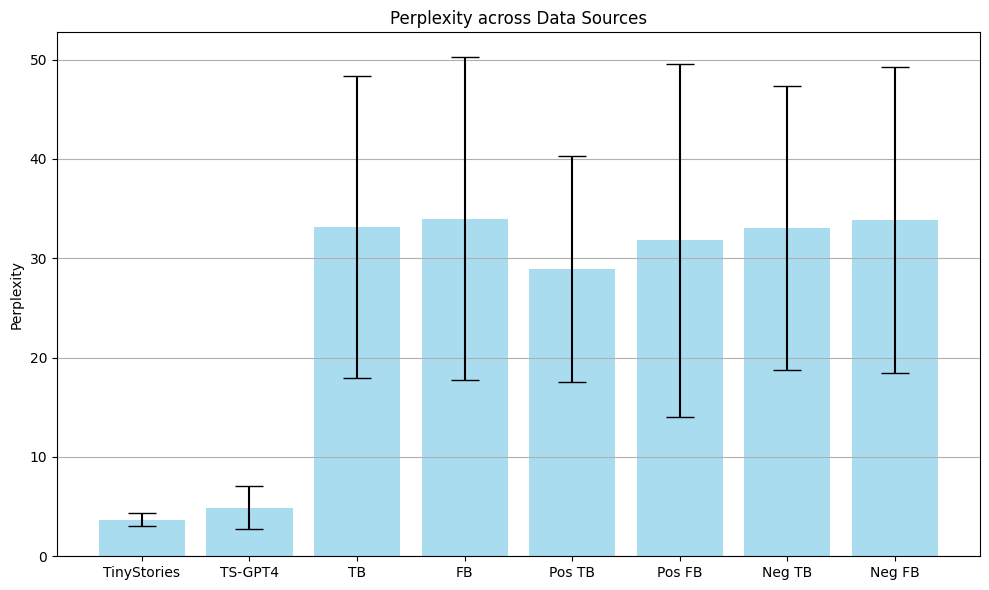

In [203]:
# plot the results
import matplotlib.pyplot as plt
import numpy as np

names = ['TinyStories', 'TS-GPT4', 'TB', 'FB', 'Pos TB', 'Pos FB', 'Neg TB', 'Neg FB']
means = [tinystories_ppl, tinystories_gpt4_ppl, tb_ppl, fb_ppl, pos_tb_ppl, pos_fb_ppl, neg_tb_ppl, neg_fb_ppl]
medians = [np.median(tinystories_ppl_all), np.median(tinystories_gpt4_ppl_all), np.median(tb_ppl_all), np.median(fb_ppl_all), np.median(pos_tb_ppl_all), np.median(pos_fb_ppl_all), np.median(neg_tb_ppl_all), np.median(neg_fb_ppl_all)]
stds = [np.std(tinystories_ppl_all), np.std(tinystories_gpt4_ppl_all), np.std(tb_ppl_all), np.std(fb_ppl_all), np.std(pos_tb_ppl_all), np.std(pos_fb_ppl_all), np.std(neg_tb_ppl_all), np.std(neg_fb_ppl_all)]
# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(names, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10, color='skyblue')
ax.scatter(names, medians, color='red', marker='D', label='Median', zorder=3)


ax.set_ylabel('Perplexity')
ax.set_title('Perplexity across Data Sources')
ax.yaxis.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('perplexity_plot.png')
plt.show()

## How does the length compare? 

In [204]:
# plot by mean length and std
tinystories_len = [len(s.split()) for s in tinystories]
tinystories_gpt4_len = [len(s.split()) for s in tinystories_gpt4]
tb_len = [len(s.split()) for s in tb_stories]
fb_len = [len(s.split()) for s in fb_stories]
pos_tb_len = [len(s.split()) for s in pos_tb_stories]
pos_fb_len = [len(s.split()) for s in pos_fb_stories]
neg_tb_len = [len(s.split()) for s in neg_tb_stories]
neg_fb_len = [len(s.split()) for s in neg_fb_stories]

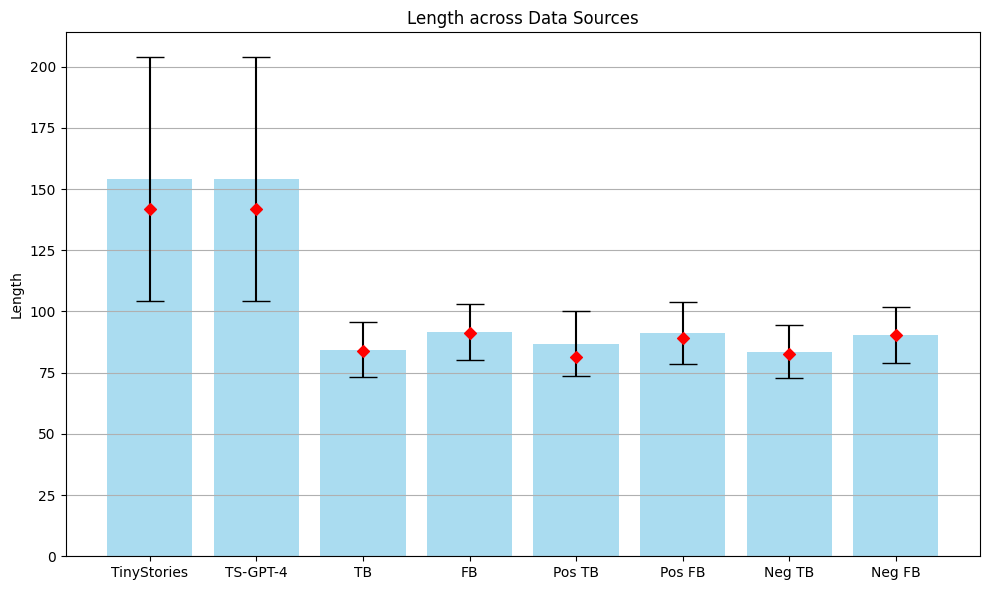

In [268]:
names = ['TinyStories', 'TS-GPT-4', 'TB', 'FB', 'Pos TB', 'Pos FB', 'Neg TB', 'Neg FB']
means = [np.mean(tinystories_len), np.mean(tinystories_gpt4_len), np.mean(tb_len), np.mean(fb_len), np.mean(pos_tb_len), np.mean(pos_fb_len), np.mean(neg_tb_len), np.mean(neg_fb_len)]
medians = [np.median(tinystories_len), np.median(tinystories_gpt4_len), np.median(tb_len), np.median(fb_len), np.median(pos_tb_len), np.median(pos_fb_len), np.median(neg_tb_len), np.median(neg_fb_len)]
stds = [np.std(tinystories_len), np.std(tinystories_gpt4_len), np.std(tb_len), np.std(fb_len), np.std(pos_tb_len), np.std(pos_fb_len), np.std(neg_tb_len), np.std(neg_fb_len)]
# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(names, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10, color='skyblue')
ax.scatter(names, medians, color='red', marker='D', label='Median', zorder=3)
ax.set_ylabel('Length')
ax.set_title('Length across Data Sources')
ax.yaxis.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('length.png')
plt.show()

## More Perplexity Analysis

In [207]:
# print means and stds in a pretty table
print('------------------')
print('Mean Perplexity')
print('------------------')
print('TinyStories: ', tinystories_ppl, np.std(tinystories_ppl_all))
print('TS-GPT-4: ', tinystories_gpt4_ppl, np.std(tinystories_gpt4_ppl_all))
print('TB: ', tb_ppl, np.std(tb_ppl_all))
print('FB: ', fb_ppl, np.std(fb_ppl_all))
print('Pos TB: ', pos_tb_ppl, np.std(pos_tb_ppl_all))
print('Pos FB: ', pos_fb_ppl, np.std(pos_fb_ppl_all))
print('Neg TB: ', neg_tb_ppl, np.std(neg_tb_ppl_all))
print('Neg FB: ', neg_fb_ppl, np.std(neg_fb_ppl_all))
print('------------------')

------------------
Mean Perplexity
------------------
TinyStories:  3.6981243562698363 0.6496311453217404
TS-GPT-4:  4.877189011573791 2.1776434343909514
TB:  33.191984004974366 15.2043622409846
FB:  33.98767538070679 16.245520198862
Pos TB:  28.905580520629883 11.408093739381172
Pos FB:  31.805203596750896 17.79924248435723
Neg TB:  33.03294164256046 14.294903529634512
Neg FB:  33.85008310016833 15.408711252302476
------------------


In [214]:
# pretty print the max, min perplexities
print('------------------')
print('Max, Min, Median Perplexity')
print('------------------')
print('pos_tb_ppl_all: ', min(pos_tb_ppl_all), max(pos_tb_ppl_all), np.median(pos_tb_ppl_all))
print('neg_tb_ppl_all: ', min(neg_tb_ppl_all), max(neg_tb_ppl_all), np.median(neg_tb_ppl_all))
print('pos_fb_ppl_all: ', min(pos_fb_ppl_all), max(pos_fb_ppl_all), np.median(pos_fb_ppl_all))
print('neg_fb_ppl_all: ', min(neg_fb_ppl_all), max(neg_fb_ppl_all), np.median(neg_fb_ppl_all))
print('------------------')

------------------
Max, Min, Median Perplexity
------------------
pos_tb_ppl_all:  18.051504135131836 51.546836853027344 23.86131000518799
neg_tb_ppl_all:  14.819050788879395 75.05628204345703 28.580957412719727
pos_fb_ppl_all:  15.821732521057129 69.3550033569336 26.23844051361084
neg_fb_ppl_all:  14.303092002868652 82.77051544189453 28.559767723083496
------------------


In [215]:
pos_ppl = np.array(pos_tb_ppl_all + pos_fb_ppl_all)
neg_ppl = np.array(neg_tb_ppl_all + neg_fb_ppl_all)
print('------------------')
print('Mean Perplexity')
print('------------------')
print('Pos: ', np.mean(pos_ppl), np.std(pos_ppl))
print('Neg: ', np.mean(neg_ppl), np.std(neg_ppl))
print('------------------')

------------------
Mean Perplexity
------------------
Pos:  30.355392058690388 15.019346569928434
Neg:  33.44151237136439 14.867859789816102
------------------


In [216]:
print('------------------')
print('Max, Min, Median Perplexity')
print('------------------')
print('Pos: ', min(pos_ppl), max(pos_ppl), np.median(pos_ppl))
print('Neg: ', min(neg_ppl), max(neg_ppl), np.median(neg_ppl))
print('------------------')

------------------
Max, Min, Median Perplexity
------------------
Pos:  15.821732521057129 69.3550033569336 23.86131000518799
Neg:  14.303092002868652 82.77051544189453 28.559767723083496
------------------


## Part-wise perplexity analysis

In [241]:
# read converted parts
path = f'../../data/tinytom/tinytom_converted_parts.txt'
all_parts = {
    'context': [],
    'change': []
}
unconverted_parts = {
    'context': [],
    'change': []
}
pos_parts = {
    'context': [],
    'change': []
}
neg_parts = {
    'context': [],
    'change': []
}
with open(path, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines):
        context, change, _ = line.strip().split(';')
        all_parts['context'].append(context)
        all_parts['change'].append(context + '. ' + change)
        if l in ids:
            pos_parts['context'].append(context)
            pos_parts['change'].append(context + '. ' + change)
        if l in neg_ids:
            neg_parts['context'].append(context)
            neg_parts['change'].append(context + '. ' + change)

unconverted_path = f'../../data/conditions/tinytom/0_forward_belief_true_belief/stories_trimmed.csv'
with open(unconverted_path, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines):
        context_change = line.split(';')[0].strip()
        assert len(context_change.split('. ')) == 5
        sentences = context_change.split('. ')
        context = '. '.join(sentences[:3]) + '.'
        unconverted_parts['context'].append(context)
        unconverted_parts['change'].append(context_change)


In [242]:
print(unconverted_parts['context'][0], all_parts['context'][0])
print(unconverted_parts['change'][0], all_parts['change'][0])

Nala was in her room ready to sleep. Nala wants to have a good night's sleep without any nightmares. The door to Nala's room is locked. Once upon a time, in a cozy little room, lived a girl named Nala. She was all tucked in, ready for a peaceful night's sleep. She wished for sweet dreams, no scary nightmares tonight! Her room door was safely locked.
Nala was in her room ready to sleep. Nala wants to have a good night's sleep without any nightmares. The door to Nala's room is locked. Her little brother manages to find the spare key and unlocks the door to her room. Nala hears her brother unlocking the door. Once upon a time, in a cozy little room, lived a girl named Nala. She was all tucked in, ready for a peaceful night's sleep. She wished for sweet dreams, no scary nightmares tonight! Her room door was safely locked.. With a giggle, her baby brother found the extra key. He used it to open the door to her room, just like in a game of hide and seek.


In [243]:
unconverted_parts_context_ppl_all, unconverted_parts_context_ppl = get_ppl(unconverted_parts['context'])
parts_context_ppl_all, parts_context_ppl = get_ppl(all_parts['context'])
parts_change_ppl_all, parts_change_ppl = get_ppl(all_parts['change'])
pos_parts_context_ppl_all, pos_parts_context_ppl = get_ppl(pos_parts['context'])
pos_parts_change_ppl_all, pos_parts_change_ppl = get_ppl(pos_parts['change'])
neg_parts_context_ppl_all, neg_parts_context_ppl = get_ppl(neg_parts['context'])
neg_parts_change_ppl_all, neg_parts_change_ppl = get_ppl(neg_parts['change'])


truncated list


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


truncated list


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:14<00:00,  3.62s/it]


truncated list


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:22<00:00,  5.62s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:02<00:00,  2.31s/it]
Using pad_token, but it is not set yet.
100%|██████████| 3/3 [00:08<00:00,  2.84s/it]
Using pad_token, but it is not set yet.
100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


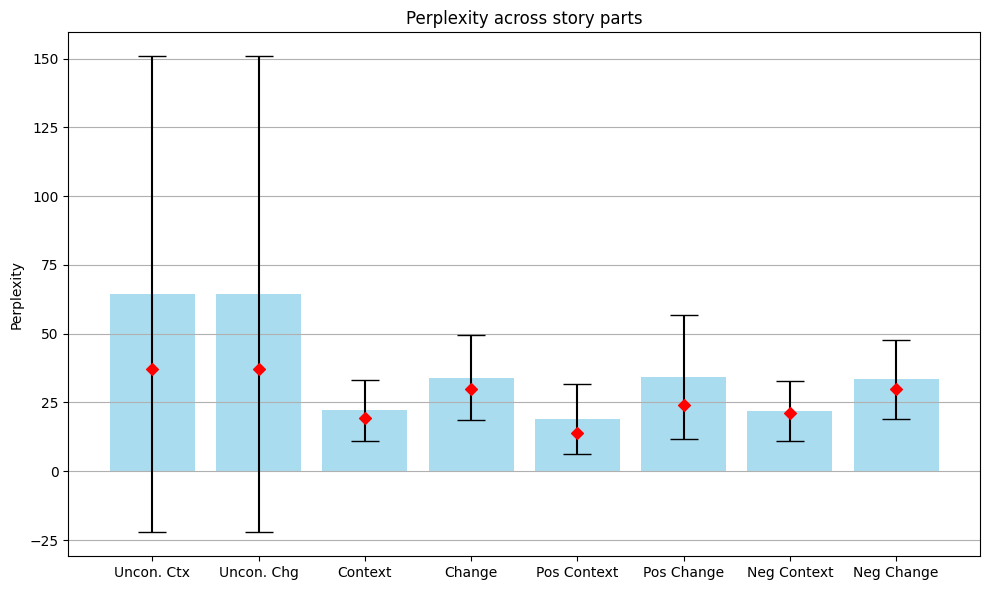

In [267]:
# plot the results
names = ['Uncon. Ctx', 'Uncon. Chg', 'Context',  'Change', 'Pos Context', 'Pos Change', 'Neg Context', 'Neg Change']
means = [unconverted_parts_context_ppl, unconverted_parts_context_ppl, parts_context_ppl, parts_change_ppl, pos_parts_context_ppl, pos_parts_change_ppl, neg_parts_context_ppl, neg_parts_change_ppl]
medians = [np.median(unconverted_parts_context_ppl_all), np.median(unconverted_parts_context_ppl_all), np.median(parts_context_ppl_all), np.median(parts_change_ppl_all), np.median(pos_parts_context_ppl_all), np.median(pos_parts_change_ppl_all), np.median(neg_parts_context_ppl_all), np.median(neg_parts_change_ppl_all)]
stds = [np.std(unconverted_parts_context_ppl_all), np.std(unconverted_parts_context_ppl_all), np.std(parts_context_ppl_all), np.std(parts_change_ppl_all), np.std(pos_parts_context_ppl_all), np.std(pos_parts_change_ppl_all), np.std(neg_parts_context_ppl_all), np.std(neg_parts_change_ppl_all)]
# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(names, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10, color='skyblue')
ax.scatter(names, medians, color='red', marker='D', label='Median', zorder=3)
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity across story parts')
ax.yaxis.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('perplexity_parts_plot.png')
plt.show()


In [249]:
# pretty print the mean, median, min, max, std perplexities
print('------------------')
print('Uncon.Ctx')
print('------------------')
print(f"{unconverted_parts_context_ppl:.2f} & {np.median(unconverted_parts_context_ppl_all):.2f} & {min(unconverted_parts_context_ppl_all):.2f} & {max(unconverted_parts_context_ppl_all):.2f} & {np.std(unconverted_parts_context_ppl_all):.2f} \\\\")
print('------------------')
print('Uncon.Chg')
print('------------------')
print(f"{unconverted_parts_context_ppl:.2f} & {np.median(unconverted_parts_context_ppl_all):.2f} & {min(unconverted_parts_context_ppl_all):.2f} & {max(unconverted_parts_context_ppl_all):.2f} & {np.std(unconverted_parts_context_ppl_all):.2f} \\\\")
print('------------------')
print('Context')
print('------------------')
print(f"{parts_context_ppl:.2f} & {np.median(parts_context_ppl_all):.2f} & {min(parts_context_ppl_all):.2f} & {max(parts_context_ppl_all):.2f} & {np.std(parts_context_ppl_all):.2f} \\\\")
print('------------------')
print('Change')
print('------------------')
print(f"{parts_change_ppl:.2f} & {np.median(parts_change_ppl_all):.2f} & {min(parts_change_ppl_all):.2f} & {max(parts_change_ppl_all):.2f} & {np.std(parts_change_ppl_all):.2f} \\\\")
print('------------------')
print('Pos Context')
print('------------------')
print(f"{pos_parts_context_ppl:.2f} & {np.median(pos_parts_context_ppl_all):.2f} & {min(pos_parts_context_ppl_all):.2f} & {max(pos_parts_context_ppl_all):.2f} & {np.std(pos_parts_context_ppl_all):.2f} \\\\")
print('------------------')
print('Neg Context')
print('------------------')
print(f"{neg_parts_context_ppl:.2f} & {np.median(neg_parts_context_ppl_all):.2f} & {min(neg_parts_context_ppl_all):.2f} & {max(neg_parts_context_ppl_all):.2f} & {np.std(neg_parts_context_ppl_all):.2f} \\\\")
print('------------------')
print('Pos Change')
print('------------------')
print(f"{pos_parts_change_ppl:.2f} & {np.median(pos_parts_change_ppl_all):.2f} & {min(pos_parts_change_ppl_all):.2f} & {max(pos_parts_change_ppl_all):.2f} & {np.std(pos_parts_change_ppl_all):.2f} \\\\")
print('------------------')
print('Neg Change')
print('------------------')
print(f"{neg_parts_change_ppl:.2f} & {np.median(neg_parts_change_ppl_all):.2f} & {min(neg_parts_change_ppl_all):.2f} & {max(neg_parts_change_ppl_all):.2f} & {np.std(neg_parts_change_ppl_all):.2f} \\\\")
print('------------------')





------------------
Uncon.Ctx
------------------
64.33 & 37.33 & 15.57 & 592.19 & 86.58 \\
------------------
Uncon.Chg
------------------
64.33 & 37.33 & 15.57 & 592.19 & 86.58 \\
------------------
Context
------------------
22.21 & 19.45 & 7.47 & 55.31 & 11.13 \\
------------------
Change
------------------
34.07 & 29.83 & 14.93 & 82.58 & 15.48 \\
------------------
Pos Context
------------------
18.96 & 13.92 & 9.08 & 47.07 & 12.82 \\
------------------
Neg Context
------------------
22.00 & 21.15 & 7.47 & 55.31 & 10.89 \\
------------------
Pos Change
------------------
34.24 & 23.96 & 15.47 & 82.58 & 22.65 \\
------------------
Neg Change
------------------
33.41 & 29.83 & 14.93 & 73.23 & 14.26 \\
------------------


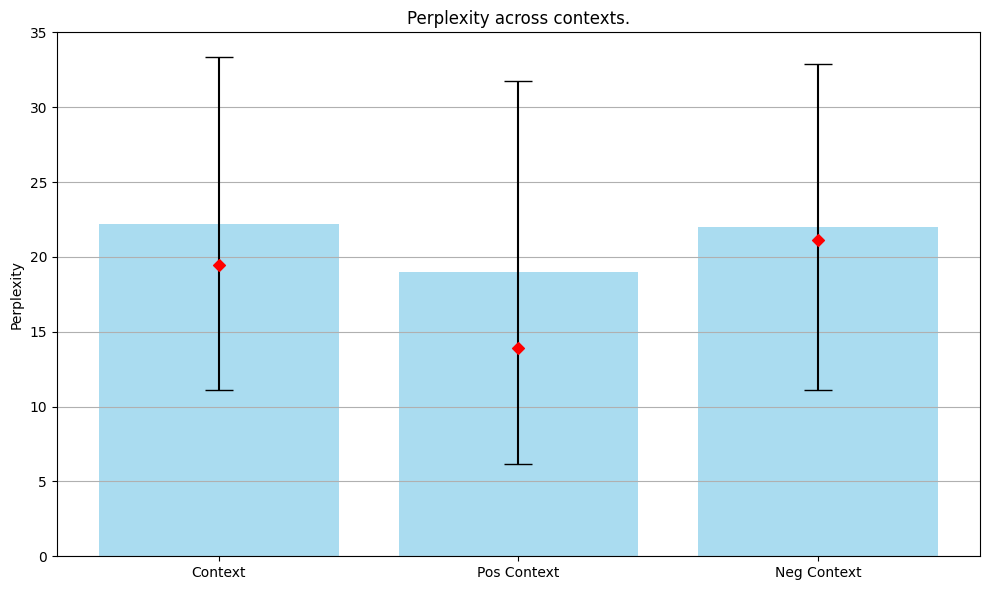

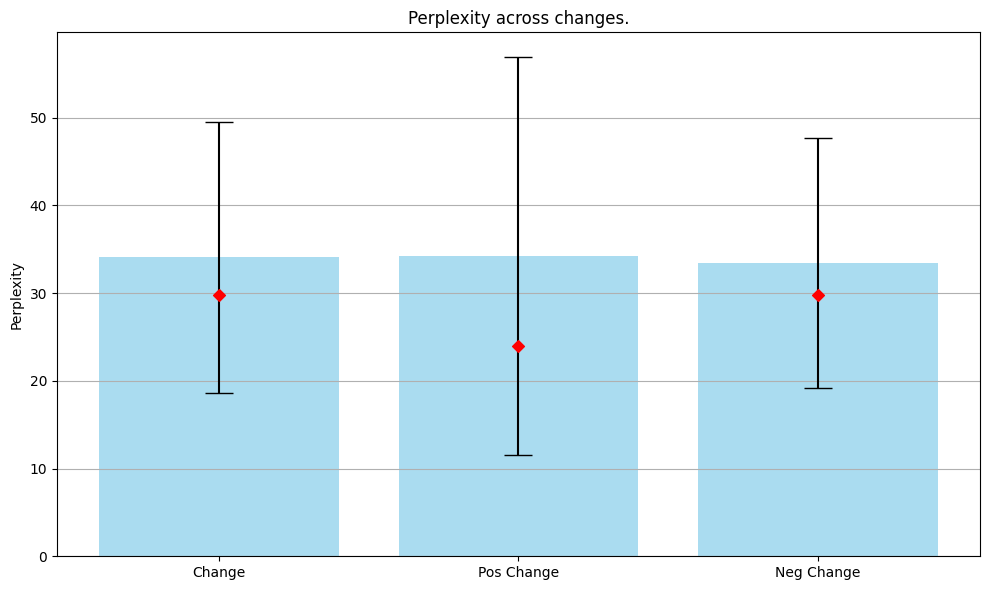

In [270]:
# split the plots by context and change
# plot the results
names = ['Context', 'Pos Context', 'Neg Context']
means = [parts_context_ppl, pos_parts_context_ppl, neg_parts_context_ppl]
medians = [np.median(parts_context_ppl_all), np.median(pos_parts_context_ppl_all), np.median(neg_parts_context_ppl_all)]
stds = [np.std(parts_context_ppl_all), np.std(pos_parts_context_ppl_all), np.std(neg_parts_context_ppl_all)]
# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(names, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10, color='skyblue')
ax.scatter(names, medians, color='red', marker='D', label='Median', zorder=3)
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity across contexts.')
ax.yaxis.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('perplexity_context_plot.png')
plt.show()

# plot the results
names = ['Change', 'Pos Change', 'Neg Change']
means = [parts_change_ppl, pos_parts_change_ppl, neg_parts_change_ppl]
medians = [np.median(parts_change_ppl_all), np.median(pos_parts_change_ppl_all), np.median(neg_parts_change_ppl_all)]
stds = [np.std(parts_change_ppl_all), np.std(pos_parts_change_ppl_all), np.std(neg_parts_change_ppl_all)]
# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(names, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10, color='skyblue')
ax.scatter(names, medians, color='red', marker='D', label='Median', zorder=3)
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity across changes.')
ax.yaxis.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('perplexity_change_plot.png')
plt.show()

# Test name change

In [265]:
print(parts_context_ppl_all[6])
print(all_parts["context"][6])


7.474111557006836
Once upon a time, Gigi and her friends were playing in the park. Gigi had a box full of big, yummy mints. She wanted to share her mints with all her friends.


In [266]:
name_change = "Once upon a time, Lily and her friends were playing in the park. Lily had a box full of big, yummy mints. She wanted to share her mints with all her friends."

print(get_ppl([name_change])[1])

Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

7.911665916442871


# Propose filter


In [16]:
# filter parameters
# condition thresholds
tb_thresh = 23.86131000518799
fb_thresh = 26.23844051361084
# part-based thresholds
context_thresh = 13.92
change_thresh = 23.96

# TinyToM v1.0 with filter


In [17]:
# read files

offset = 100 # converted parts dont exist for the first 50 in a separate file
tb1_stories = []
fb1_stories = []
tt1_parts = {
    'context': [],
    'change': []
}

tb1_cond_file  = f'../../data/conditions/tinytom-v1/0_forward_belief_true_belief/converted.txt'
fb1_cond_file  = f'../../data/conditions/tinytom-v1/0_forward_belief_false_belief/converted.txt'
with open(tb1_cond_file, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines[offset:]):
        tb1_stories.append(line.strip())

with open(fb1_cond_file, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines[offset:]):        
        fb1_stories.append(line.strip())

path = f'../../data/tinytom/v1/tinytom_converted_parts.txt'

with open(path, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines[offset:]):
        context, change, _ = line.strip().split(';')
        tt1_parts['context'].append(context)
        tt1_parts['change'].append(context + '. ' + change)

In [18]:
# get ppl of different lists
# batch size 50
print(f"getting ppl for {len(tb1_stories)} templates")
tb1_ppl, fb1_ppl, tt1_context_ppl, tt1_change_ppl = [], [], [], []
for i in range(0, len(tb1_stories), 50):
    print(f"getting ppl for {i} to {i+50}/{len(tb1_stories)} templates")
    if i + 50 > len(tb1_stories):
        batch_tb_stories = tb1_stories[i:]
        batch_fb_stories = fb1_stories[i:]
        batch_tt_context = tt1_parts['context'][i:]
        batch_tt_change = tt1_parts['change'][i:]
    else:
        batch_tb_stories = tb1_stories[i:i+50]
        batch_fb_stories = fb1_stories[i:i+50]
        batch_tt_context = tt1_parts['context'][i:i+50]
        batch_tt_change = tt1_parts['change'][i:i+50]
        
    batch_tb_ppl, _ = get_ppl(tb1_stories[i:i+50])
    batch_fb_ppl, _ = get_ppl(fb1_stories[i:i+50])
    batch_tt_context_ppl, _ = get_ppl(tt1_parts['context'][i:i+50])
    batch_tt_change_ppl, _ = get_ppl(tt1_parts['change'][i:i+50])
    tb1_ppl+=batch_tb_ppl
    fb1_ppl+=batch_fb_ppl
    tt1_context_ppl+=batch_tt_context_ppl
    tt1_change_ppl+=batch_tt_change_ppl

getting ppl for 463 templates
getting ppl for 0 to 50/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:22<00:00,  5.52s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:26<00:00,  6.50s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:11<00:00,  2.89s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:19<00:00,  4.75s/it]


getting ppl for 50 to 100/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:26<00:00,  6.60s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:30<00:00,  7.63s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:14<00:00,  3.75s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:22<00:00,  5.61s/it]


getting ppl for 100 to 150/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:21<00:00,  5.34s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:24<00:00,  6.02s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:10<00:00,  2.70s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:19<00:00,  4.97s/it]


getting ppl for 150 to 200/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:26<00:00,  6.51s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:25<00:00,  6.40s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:12<00:00,  3.14s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:17<00:00,  4.39s/it]


getting ppl for 200 to 250/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:18<00:00,  4.60s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:18<00:00,  4.68s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:08<00:00,  2.22s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:13<00:00,  3.48s/it]


getting ppl for 250 to 300/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:19<00:00,  4.88s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:22<00:00,  5.52s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:12<00:00,  3.03s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:16<00:00,  4.12s/it]


getting ppl for 300 to 350/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:27<00:00,  6.93s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:25<00:00,  6.27s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:12<00:00,  3.17s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:18<00:00,  4.69s/it]


getting ppl for 350 to 400/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:22<00:00,  5.66s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:23<00:00,  5.77s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:10<00:00,  2.73s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:19<00:00,  4.75s/it]


getting ppl for 400 to 450/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:21<00:00,  5.42s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:22<00:00,  5.60s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:09<00:00,  2.47s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:19<00:00,  4.79s/it]


getting ppl for 450 to 500/463 templates


Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:05<00:00,  5.83s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:05<00:00,  5.59s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
Using pad_token, but it is not set yet.
100%|██████████| 1/1 [00:04<00:00,  4.86s/it]


In [20]:
# show average perplexity
import numpy as np
print(f"tb1_ppl: {np.mean(tb1_ppl)}")
print(f"fb1_ppl: {np.mean(fb1_ppl)}")
print(f"tt1_context_ppl: {np.mean(tt1_context_ppl)}")
print(f"tt1_change_ppl: {np.mean(tt1_change_ppl)}")

tb1_ppl: 31.13096433272887
fb1_ppl: 29.94750014237142
tt1_context_ppl: 19.447871960007603
tt1_change_ppl: 32.96632177628915


# TinyToM v1.0 analysis


In [22]:
# filter the templates
ids_to_remove, ids_to_keep = [], []
change_filters_triggered, context_filters_triggered, tb_filters_triggered, fb_filters_triggered = [], [], [], []
for i in range(len(tb1_stories)):
    if tb1_ppl[i] > tb_thresh:
        tb_filters_triggered.append(i) 
    elif fb1_ppl[i] > fb_thresh:
        fb_filters_triggered.append(i)
    elif tt1_context_ppl[i] > context_thresh:
        context_filters_triggered.append(i)
    elif tt1_change_ppl[i] > change_thresh:
        change_filters_triggered.append(i)
    else:
        ids_to_keep.append(i)
        continue
    ids_to_remove.append(i)

In [23]:
# print results
print(f"tb_filters_triggered: {len(tb_filters_triggered)}")
print(f"fb_filters_triggered: {len(fb_filters_triggered)}")
print(f"context_filters_triggered: {len(context_filters_triggered)}")
print(f"change_filters_triggered: {len(change_filters_triggered)}")
print(f"ids_to_remove: {len(ids_to_remove)}")
print(f"ids_to_keep: {len(ids_to_keep)}")

tb_filters_triggered: 303
fb_filters_triggered: 0
context_filters_triggered: 53
change_filters_triggered: 21
ids_to_remove: 377
ids_to_keep: 86


In [24]:
# save the useful ids
with open(f'../../data/conditions/tinytom-v1/ids_to_keep.txt', 'w') as f:
    for i in ids_to_keep:
        f.write(f"{i}\n")
# save filter values
with open(f'../../data/conditions/tinytom-v1/filter_values.txt', 'w') as f:
    f.write(f"tb_thresh: {tb_thresh}\n")
    f.write(f"fb_thresh: {fb_thresh}\n")
    f.write(f"context_thresh: {context_thresh}\n")
    f.write(f"change_thresh: {change_thresh}\n")

# TinyToM v3.0 with filter


In [41]:
# read files
offset = 0 # converted parts dont exist for the first 50 in a separate file
tb3_stories = []
fb3_stories = []
tt3_parts = {
    'context': [],
    'change': []
}

tb3_cond_file  = f'../../data/conditions/tinytom-v3/0_forward_belief_true_belief/converted.txt'
fb3_cond_file  = f'../../data/conditions/tinytom-v3/0_forward_belief_false_belief/converted.txt'
with open(tb3_cond_file, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines[offset:]):
        tb3_stories.append(line.strip())

with open(fb1_cond_file, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines[offset:]):        
        fb3_stories.append(line.strip())

path = f'../../data/tinytom/v3/tinytom_converted_parts.txt'

with open(path, 'r') as f:
    lines = f.readlines()
    for l, line in enumerate(lines[offset:]):
        context, change, _ = line.strip().split(';')
        tt3_parts['context'].append(context)
        tt3_parts['change'].append(context + '. ' + change)

In [42]:
# get ppl of different lists
# batch size 50
print(f"getting ppl for {len(tb3_stories)} templates")
tb3_ppl, fb3_ppl, tt3_context_ppl, tt3_change_ppl = [], [], [], []
for i in range(0, len(tb3_stories), 50):
    print(f"getting ppl for {i} to {i+50}/{len(tb3_stories)} templates")
    if i + 50 > len(tb3_stories):
        batch_tb_stories = tb3_stories[i:]
        batch_fb_stories = fb3_stories[i:]
        batch_tt_context = tt3_parts['context'][i:]
        batch_tt_change = tt3_parts['change'][i:]
    else:
        batch_tb_stories = tb3_stories[i:i+50]
        batch_fb_stories = fb3_stories[i:i+50]
        batch_tt_context = tt3_parts['context'][i:i+50]
        batch_tt_change = tt3_parts['change'][i:i+50]
        
    batch_tb_ppl, _ = get_ppl(tb3_stories[i:i+50])
    batch_fb_ppl, _ = get_ppl(fb3_stories[i:i+50])
    batch_tt_context_ppl, _ = get_ppl(tt3_parts['context'][i:i+50])
    batch_tt_change_ppl, _ = get_ppl(tt3_parts['change'][i:i+50])
    tb3_ppl+=batch_tb_ppl
    fb3_ppl+=batch_fb_ppl
    tt3_context_ppl+=batch_tt_context_ppl
    tt3_change_ppl+=batch_tt_change_ppl

getting ppl for 50 templates
getting ppl for 0 to 50/50 templates


Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:23<00:00,  5.94s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:35<00:00,  8.99s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:12<00:00,  3.16s/it]
Using pad_token, but it is not set yet.
100%|██████████| 4/4 [00:21<00:00,  5.30s/it]


In [43]:
# show average perplexity, and compare to v1
import numpy as np
print(f"tb3_ppl: {np.mean(tb3_ppl)} vs tb1_ppl: {np.mean(tb1_ppl)}")
print(f"fb3_ppl: {np.mean(fb3_ppl)} vs fb1_ppl: {np.mean(fb1_ppl)}")
print(f"tt3_context_ppl: {np.mean(tt3_context_ppl)} vs tt1_context_ppl: {np.mean(tt1_context_ppl)}")
print(f"tt3_change_ppl: {np.mean(tt3_change_ppl)} vs tt1_change_ppl: {np.mean(tt1_change_ppl)}")


tb3_ppl: 25.903128623962402 vs tb1_ppl: 31.13096433272887
fb3_ppl: 16.51561086654663 vs fb1_ppl: 29.94750014237142
tt3_context_ppl: 21.063324127197266 vs tt1_context_ppl: 19.447871960007603
tt3_change_ppl: 28.79307855606079 vs tt1_change_ppl: 32.96632177628915


# TinyToM v3.0 analysis

In [44]:
# filter the templates
ids_to_remove, ids_to_keep = [], []
change_filters_triggered, context_filters_triggered, tb_filters_triggered, fb_filters_triggered = [], [], [], []
for i in range(len(tb3_stories)):
    if tb3_ppl[i] > tb_thresh:
        tb_filters_triggered.append(i) 
    elif fb3_ppl[i] > fb_thresh:
        fb_filters_triggered.append(i)
    elif tt3_context_ppl[i] > context_thresh:
        context_filters_triggered.append(i)
    elif tt3_change_ppl[i] > change_thresh:
        change_filters_triggered.append(i)
    else:
        ids_to_keep.append(i)
        continue
    ids_to_remove.append(i)

In [45]:
# filter the templates
ids_to_remove, ids_to_keep = [], []
change_filters_triggered, context_filters_triggered, tb_filters_triggered, fb_filters_triggered = [], [], [], []
for i in range(len(tb3_stories)):
    if tb3_ppl[i] > tb_thresh:
        tb_filters_triggered.append(i) 
    elif fb3_ppl[i] > fb_thresh:
        fb_filters_triggered.append(i)
    elif tt3_context_ppl[i] > context_thresh:
        context_filters_triggered.append(i)
    elif tt3_change_ppl[i] > change_thresh:
        change_filters_triggered.append(i)
    else:
        ids_to_keep.append(i)
        continue
    ids_to_remove.append(i)

In [46]:
# print results
print(f"tb_filters_triggered: {len(tb_filters_triggered)}")
print(f"fb_filters_triggered: {len(fb_filters_triggered)}")
print(f"context_filters_triggered: {len(context_filters_triggered)}")
print(f"change_filters_triggered: {len(change_filters_triggered)}")
print(f"ids_to_remove: {len(ids_to_remove)}")
print(f"ids_to_keep: {len(ids_to_keep)}")

tb_filters_triggered: 25
fb_filters_triggered: 5
context_filters_triggered: 11
change_filters_triggered: 0
ids_to_remove: 41
ids_to_keep: 9


In [ ]:
# save the useful ids
with open(f'../../data/conditions/tinytom-v3/ids_to_keep.txt', 'w') as f:
    for i in ids_to_keep:
        f.write(f"{i}\n")
# save filter values
with open(f'../../data/conditions/tinytom-v3/filter_values.txt', 'w') as f:
    f.write(f"tb_thresh: {tb_thresh}\n")
    f.write(f"fb_thresh: {fb_thresh}\n")
    f.write(f"context_thresh: {context_thresh}\n")
    f.write(f"change_thresh: {change_thresh}\n")